In [757]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Used to display images in a specific colormap
import scipy
from scipy.io import loadmat
from scipy.optimize import minimize

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 7.0)
np.set_printoptions(suppress=True)

In [650]:
data = loadmat('data/ex7data2.mat')
X = data['X']
K = 3 #no of centroids

In [651]:
def dist(X,centroid):
    return np.linalg.norm(X-centroid)

In [652]:
print(dist(np.array([5,4,3]),np.array([3,2,1])))

3.46410161514


In [653]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [654]:
def find_closest_centroids(X,centroids):
    m = X.shape[0]
    nc = centroids.shape[0]
    dist_matrix = np.zeros((m,nc))
    for i in range(0,m):
        for j in range(0,nc):
#             print(X[i])
#             print("-------")
            dist_matrix[i,j] = dist(X[i],centroids[j])
    return (np.argmin(dist_matrix,axis=1)+1)

In [655]:
idx = find_closest_centroids(X,initial_centroids)

In [656]:
def compute_centroids(X, idx, K):
    centroids = np.zeros((K,X.shape[1]))
    for i in range(K):
        x = X[idx == i+1]
        centroids[i] = np.mean(x,axis=0)
    return centroids

In [657]:
centroids = compute_centroids(X, idx, K)

In [658]:
def plot_data_points(X,idx,K,axes = None):
    if axes == None:
        axes = plt.gca()
    color = iter( cm.rainbow( np.linspace( 0, 1, K ) ) )
    for i in range(K):
        x = X[idx == i+1]
        axes.scatter(x[:,0],x[:,1],s=50,c=next(color),marker='p')    

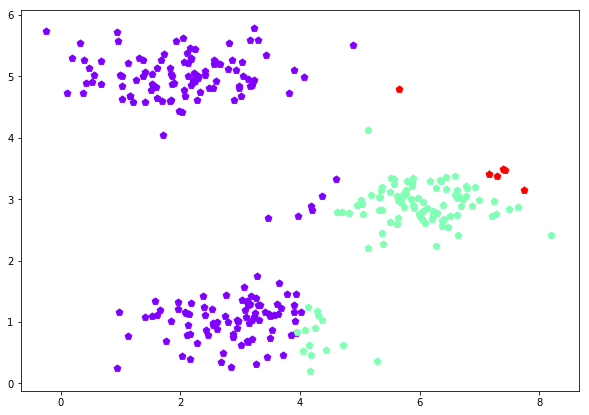

In [659]:
plot_data_points(X,idx,K)

In [660]:
def run_Kmeans(X, initial_centroids,max_iterations, plot_graph):
    idx = find_closest_centroids(X,initial_centroids)
    centroid_points = np.zeros((K,max_iterations,2))
    
    for i in range(max_iterations):
        centroids = compute_centroids(X, idx, K)
        idx = find_closest_centroids(X,centroids)
        for j in range(K):
            centroid_points[j][i] = (centroids[j][0],centroids[j][1])
    
    if plot_graph == True:
        axes = plt.gca()
        plot_data_points(X,idx,K,axes)
        for j in range(K):
            axes.plot(centroid_points[j][:,0],centroid_points[j][:,1],marker = '*',c='k')
            
        axes.scatter(centroids[:,0],centroids[:,1],marker = '*',s=530,c='k')
        plt.show()
        
    return (centroids,idx)

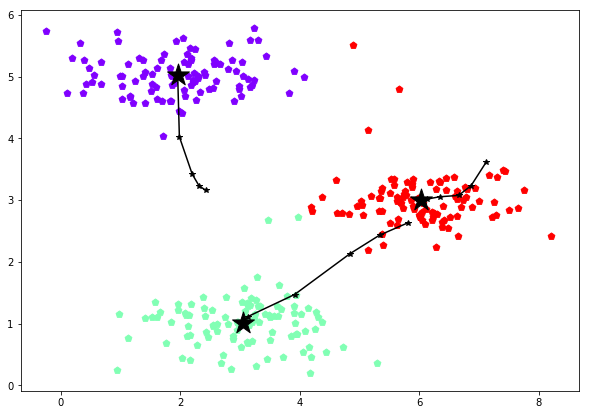

(array([[ 1.95399466,  5.02557006],
        [ 3.04367119,  1.01541041],
        [ 6.03366736,  3.00052511]]),
 array([1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [661]:
run_Kmeans(X, initial_centroids, 10, True)
# print(new_centroids.shape)

In [662]:
print(X.shape)

(300, 2)


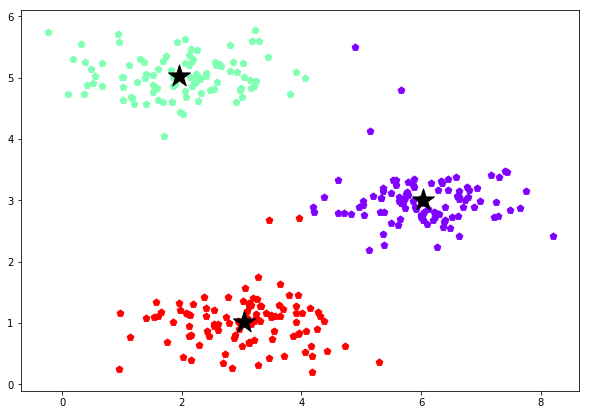

(array([[ 6.03366736,  3.00052511],
        [ 1.95399466,  5.02557006],
        [ 3.04367119,  1.01541041]]),
 array([1, 2, 3, 3, 3, 2, 2, 3, 3, 3, 1, 1, 3, 1, 2, 3, 2, 1, 1, 3, 2, 1, 2,
        1, 2, 3, 2, 1, 3, 1, 2, 3, 1, 2, 3, 3, 2, 1, 3, 2, 1, 3, 2, 2, 3, 2,
        2, 1, 3, 3, 1, 2, 3, 2, 3, 2, 1, 1, 3, 3, 2, 3, 3, 3, 3, 1, 2, 2, 2,
        3, 2, 1, 1, 3, 2, 2, 3, 3, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2, 3, 1, 1, 3,
        2, 3, 2, 3, 3, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 3, 3, 3, 1, 2, 3, 3, 1,
        2, 2, 3, 3, 1, 2, 2, 3, 3, 2, 2, 3, 3, 1, 3, 1, 1, 1, 3, 2, 2, 3, 3,
        3, 1, 3, 2, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2, 1, 1, 3, 2, 2, 1, 1,
        1, 3, 2, 1, 3, 2, 3, 1, 2, 3, 2, 1, 1, 3, 2, 3, 1, 2, 1, 1, 3, 2, 1,
        1, 1, 1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 3, 1, 2, 1, 2, 3, 2, 3, 2, 3, 1,
        3, 2, 1, 1, 1, 1, 3, 1, 2, 3, 3, 2, 1, 1, 2, 3, 2, 1, 3, 3, 2, 2, 2,
        1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2, 2, 2, 3,
        1, 2, 2, 3, 2, 3, 1, 3, 3, 1, 1, 1,

In [663]:
np.random.shuffle(X)
initial_centroids = X[:K,:]
run_Kmeans(X, initial_centroids, 10, True)
# X = np.random.shuffle(X)
# print(X.shape)

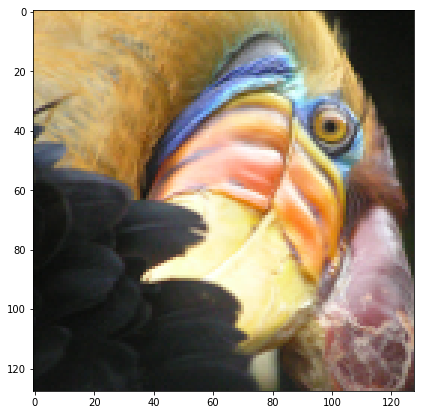

In [704]:
img = plt.imread('data/bird_small.png')
plt.imshow(img)
img_shape = img.shape
# img = img.reshape(img.shape[0]*img.shape[1],img.shape[2])

In [705]:
def kmeans_init_centroids( X, K ):
    np.random.shuffle(X)
    return X[:K,:]

In [706]:
K = 16
max_iterations = 10
img_X = img.reshape( img_shape[0]*img_shape[1], img_shape[2] )
initial_centroids = kmeans_init_centroids(np.copy(img_X), K)
# np.random.shuffle(img)
# initial_centroids = img[:K,:]
# print(initial_centroids.shape)

In [708]:
centroids,idx = run_Kmeans(img_X, initial_centroids, 10, False)
print(centroids)
print(idx)

[[ 0.70598829  0.50794828  0.22445832]
 [ 0.1769089   0.17581859  0.16812217]
 [ 0.92794859  0.6044625   0.29272822]
 [ 0.77480072  0.63431907  0.37766761]
 [ 0.38811567  0.32662013  0.30186343]
 [ 0.52720547  0.38260216  0.17710356]
 [ 0.54414421  0.45163059  0.39601082]
 [ 0.08639142  0.09342328  0.082596  ]
 [ 0.75039935  0.73707628  0.77268988]
 [ 0.88618672  0.74959278  0.50132138]
 [ 0.26983839  0.24116129  0.23113686]
 [ 0.97309679  0.91749883  0.76178622]
 [ 0.1190608   0.12785433  0.11871936]
 [ 0.06294163  0.06864312  0.05865837]
 [ 0.40220895  0.48111004  0.67529601]
 [ 0.65949798  0.58737785  0.53401631]]
[10 10 10 ...,  2  2  2]


In [711]:
img_idx = find_closest_centroids(img_X, centroids)
print(img_idx)
print(img_idx.shape)

[10 10 10 ...,  2  2  2]
(16384,)


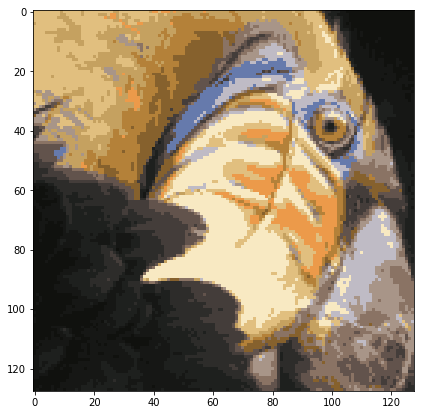

In [713]:
X_recovered = centroids[img_idx-1,:]
X_recovered = X_recovered.reshape( img_shape[0], img_shape[1], img_shape[2])
plt.imshow(X_recovered)

# 2 Principal Component Analysis

In [783]:
data = loadmat('data/ex7data1.mat')
X = data['X']

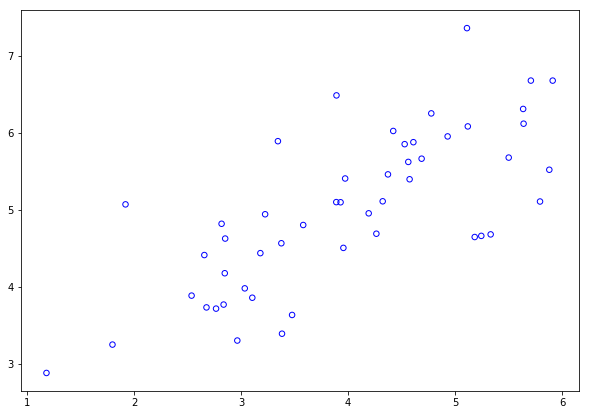

In [784]:
plt.scatter(X[:,0],X[:,1],s=30, facecolors='none', edgecolors='b')  


#### 2.2 Implementing PCA¶

In [790]:
def featureNormalize(X):
    means = np.mean(X,axis = 0)
    std = np.std(X,axis=0)
    return means,std,(X-means)/std

In [791]:
def getUSV(X):
    m = X.shape[0]
    cov_matrix = (1/m)*np.dot(X.T,X)
    U, S, V = scipy.linalg.svd(cov_matrix, full_matrices = True, compute_uv = True)
    return U, S, V

In [798]:
means,std,normalized_X = featureNormalize(X)
print(normalized_X.shape)

(50, 2)


In [799]:
U,S,V = getUSV(normalized_X)
print(U)
print(S)
print(V)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[ 1.73553038  0.26446962]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


Top principal component is  [-0.70710678 -0.70710678]


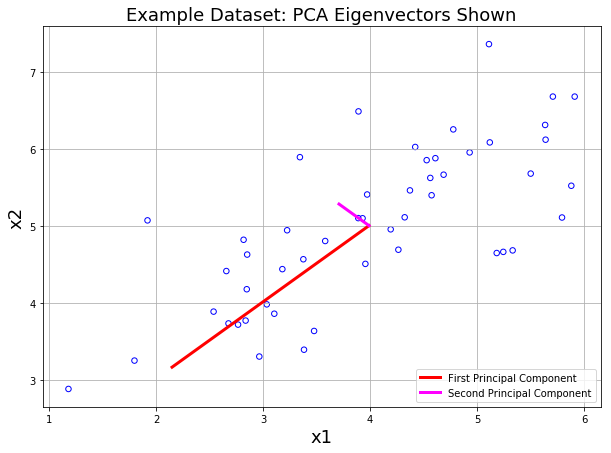

In [796]:
print ('Top principal component is ',U[:,0])
plot = plt.scatter(X[:,0], X[:,1], s=30, facecolors='none', edgecolors='b')
plt.title("Example Dataset: PCA Eigenvectors Shown",fontsize=18)
plt.xlabel('x1',fontsize=18)
plt.ylabel('x2',fontsize=18)
plt.grid(True)
plt.plot([means[0], means[0] + 1.5*S[0]*U[0,0]], 
         [means[1], means[1] + 1.5*S[0]*U[0,1]],
        color='red',linewidth=3,
        label='First Principal Component')
plt.plot([means[0], means[0] + 1.5*S[1]*U[1,0]], 
         [means[1], means[1] + 1.5*S[1]*U[1,1]],
        color='fuchsia',linewidth=3,
        label='Second Principal Component')
leg = plt.legend(loc=4)

#### 2.3 Dimensionality Reduction with PCA¶

In [800]:
def projectData(myX, myU, K):
    """
    Function that computes the reduced data representation when
    projecting only on to the top "K" eigenvectors
    """
    
    #Reduced U is the first "K" columns in U
    Ureduced = myU[:,:K]
    z = myX.dot(Ureduced)
    return z

In [804]:
z = projectData(normalized_X,U,1)
print ('Projection of the first example is %0.3f.'%float(z[0]))

Projection of the first example is 1.496.


In [805]:
def recoverData(myZ, myU, K):
    Ureduced = myU[:,:K]
    Xapprox = myZ.dot(Ureduced.T)  
    return Xapprox

In [806]:
X_rec = recoverData(z,U,1)
print ('Recovered approximation of the first example is ',X_rec[0])

Recovered approximation of the first example is  [-1.05805279 -1.05805279]


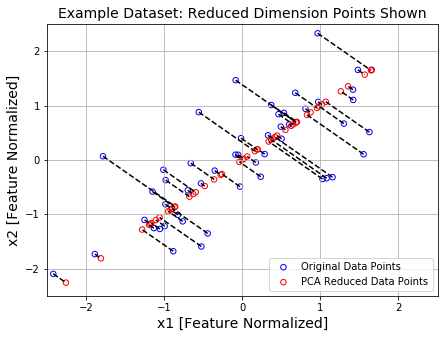

In [812]:
#Quick plot, now drawing projected points to the original points
plt.figure(figsize=(7,5))
plot = plt.scatter(normalized_X[:,0], normalized_X[:,1], s=30, facecolors='none', 
                   edgecolors='b',label='Original Data Points')
plot = plt.scatter(X_rec[:,0], X_rec[:,1], s=30, facecolors='none', 
                   edgecolors='r',label='PCA Reduced Data Points')

plt.title("Example Dataset: Reduced Dimension Points Shown",fontsize=14)
plt.xlabel('x1 [Feature Normalized]',fontsize=14)
plt.ylabel('x2 [Feature Normalized]',fontsize=14)
plt.grid(True)

for x in range(normalized_X.shape[0]):
    plt.plot([normalized_X[x,0],X_rec[x,0]],[normalized_X[x,1],X_rec[x,1]],'k--')
    
leg = plt.legend(loc=4)

#Force square axes to make projections look better
dummy = plt.xlim((-2.5,2.5))
dummy = plt.ylim((-2.5,2.5))